# 

- **Answer Set** : NO. 02
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 610301060

The goal is to dimentionality reduction of face pictures using PCA algorithm.

## 1.

### Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import sklearn.metrics
from sklearn.model_selection import KFold

### a.

**Question:** Through repeated 5 fold cross-validation with 10 repeatation compute the MSE error between the reconstructed image after dimension reduction of 3, 8, 15, 30, 45, 70, 100, 140, 200, 300, 400 and the real image.

Load the data:

In [3]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

train_faces = np.array(train_set).reshape(300, 64, 64)

Plot the 30 images for instance.

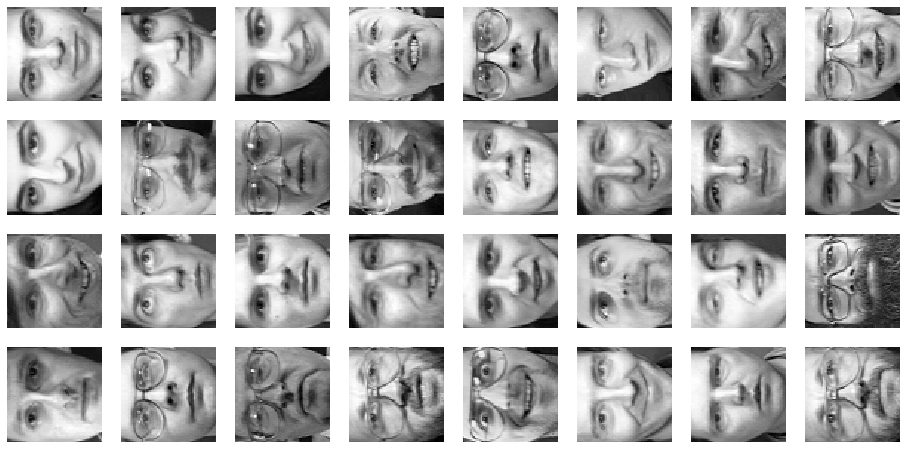

In [7]:
plt.figure(figsize=(16, 8))

for i in range(0, 32):
  plt.subplot(4, 8, i + 1)
  plt.imshow(train_faces[i], cmap = 'gray')
  plt.axis('off')
  
plt.show()

Compute pricipal components of the dataset using PCA()

In [10]:
x_train = np.array(train_set)
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Mean of the pictures:

In [11]:
pca.mean_

array([95.52333333, 96.94333333, 98.63      , ..., 71.82666667,
       73.66666667, 74.73      ])

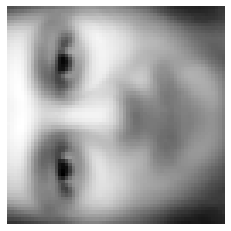

In [12]:
plt.imshow(pca.mean_.reshape(64, 64), cmap = 'gray')
plt.axis('off')  
plt.show()

PCA components:

In [13]:
pca.components_

array([[ 0.00312273,  0.00316557,  0.00363146, ...,  0.00150902,
        -0.00015355, -0.00147422],
       [ 0.02758496,  0.02871165,  0.03012808, ..., -0.02694858,
        -0.02770146, -0.02844937],
       [ 0.00127559, -0.00170876, -0.00539665, ..., -0.00856413,
        -0.00898205, -0.00759856],
       ...,
       [-0.00052242, -0.00856238, -0.00863223, ...,  0.03759114,
         0.01803062, -0.0788451 ],
       [ 0.00993009, -0.01954237, -0.01092584, ..., -0.01269036,
        -0.02701062,  0.00606819],
       [ 0.03122904,  0.02470276, -0.02552069, ..., -0.00171424,
         0.00375668,  0.00318187]])

MSE error between the reconstructed image after dimension reduction of 3, 8, 15, 30, 45, 70, 100, 140, 200, 300, 400 and the real image:

In [15]:
dimension = np.array([3, 8, 15, 30, 45, 70, 100, 140, 200, 300, 500])

mse_train = np.empty((len(dimension), 10))
mse_test = np.empty((len(dimension), 10))
k = 0
for d in dimension:
  train_mse = np.empty((10, 5))
  test_mse = np.empty((10, 5))

  for i in range(0, 10):
    X = np.arange(0, len(x_train))
    kf = KFold(n_splits = 5, shuffle = True)
    j = 0
    for train, test in kf.split(X):

      model = TruncatedSVD(n_components = d)
      model.fit(x_train[train])

      train_transformed = model.transform(x_train[train])
      train_inverse_transformed = model.inverse_transform(train_transformed)
      train_mse[i][j] = sklearn.metrics.mean_squared_error(x_train[train], train_inverse_transformed)

      test_transformed = model.transform(x_train[test])
      test_inverse_transformed = model.inverse_transform(test_transformed)
      test_mse[i][j] = sklearn.metrics.mean_squared_error(x_train[test], test_inverse_transformed)

      j = j + 1

  for i in range(0, 10):
    mse_train[k][i] = train_mse[i].mean()
    mse_test[k][i] = test_mse[i].mean()
  k = k + 1

Plot the boxplot of each MSE for each dimension reduction3, 8, 15, 30, 45, 70, 100, 140, 200, 300, 400 on training data:

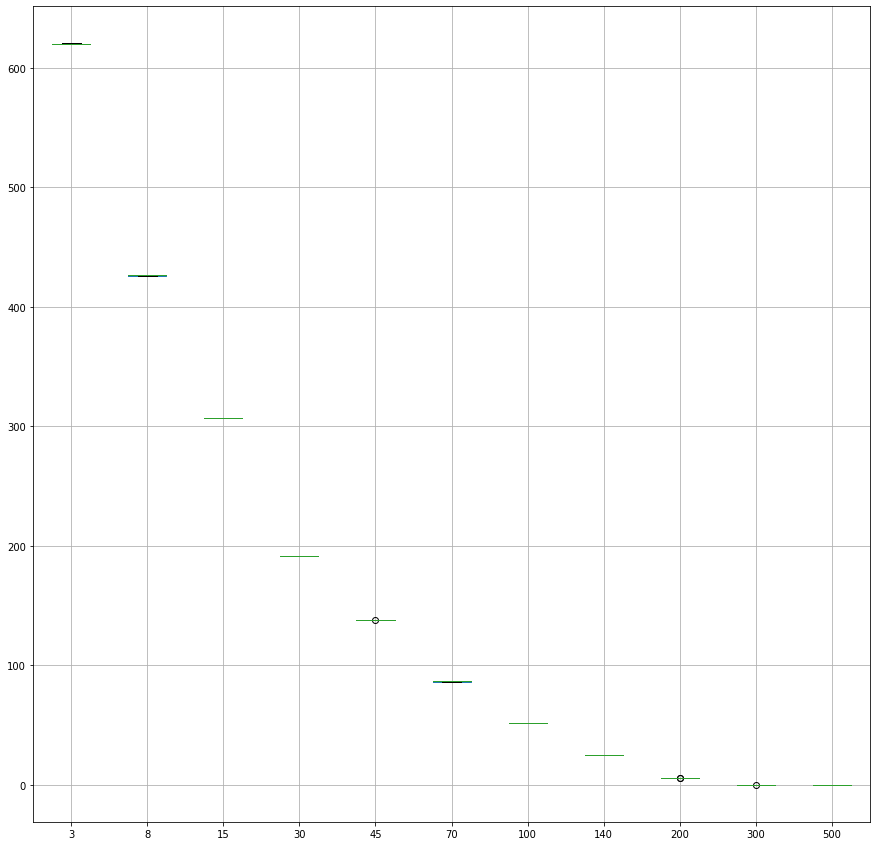

In [16]:
train_validation = pd.DataFrame({'3': mse_train[0],
                                 '8': mse_train[1],
                                 '15': mse_train[2],
                                 '30': mse_train[3],
                                 '45': mse_train[4],
                                 '70': mse_train[5],
                                 '100': mse_train[6],
                                 '140': mse_train[7],
                                 '200': mse_train[8],
                                 '300': mse_train[9],
                                 '500': mse_train[10]})
train_validation.boxplot(figsize=(15,15))

Plot the boxplot of each MSE for each dimension reduction3, 8, 15, 30, 45, 70, 100, 140, 200, 300, 400 on test data:

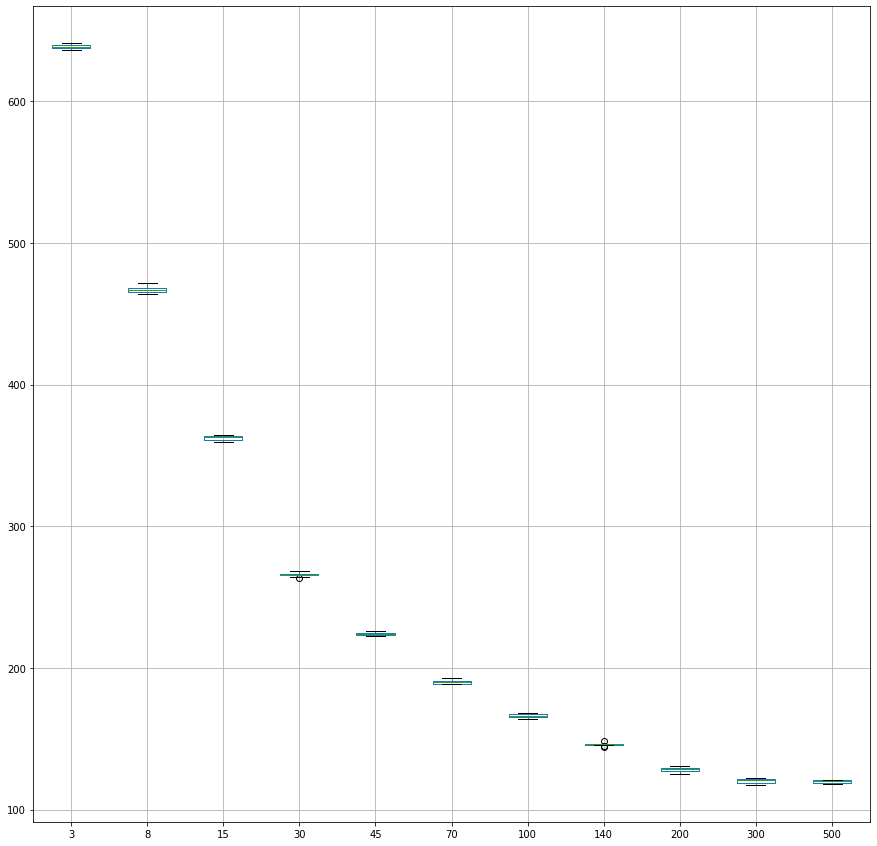

In [17]:
test_validation = pd.DataFrame({'3': mse_test[0],
                                 '8': mse_test[1],
                                 '15': mse_test[2],
                                 '30': mse_test[3],
                                 '45': mse_test[4],
                                 '70': mse_test[5],
                                 '100': mse_test[6],
                                 '140': mse_test[7],
                                 '200': mse_test[8],
                                 '300': mse_test[9],
                                 '500': mse_test[10]})
test_validation.boxplot(figsize=(15,15))

## b.

**Question:** Determine the appropriate dimension and then use it for reconstruction images and compute the MSE.

Appropriate dimension = 200

create the TruncatedSVM(n_components=200)

In [22]:
final_model = TruncatedSVD(n_components=200)
final_model.fit(x_train)

TruncatedSVD(algorithm='randomized', n_components=200, n_iter=5,
             random_state=None, tol=0.0)

Reconstucte the test images:

In [23]:
x_test = np.array(test_set)
x_test_transformed = final_model.transform(x_test)
x_test_reconstructed = final_model.inverse_transform(x_test_transformed)

Compute the MSE on test images:

In [24]:
mse_final = sklearn.metrics.mean_squared_error(x_test, x_test_reconstructed)

Plot some of real test images and their constructions:

Real images:

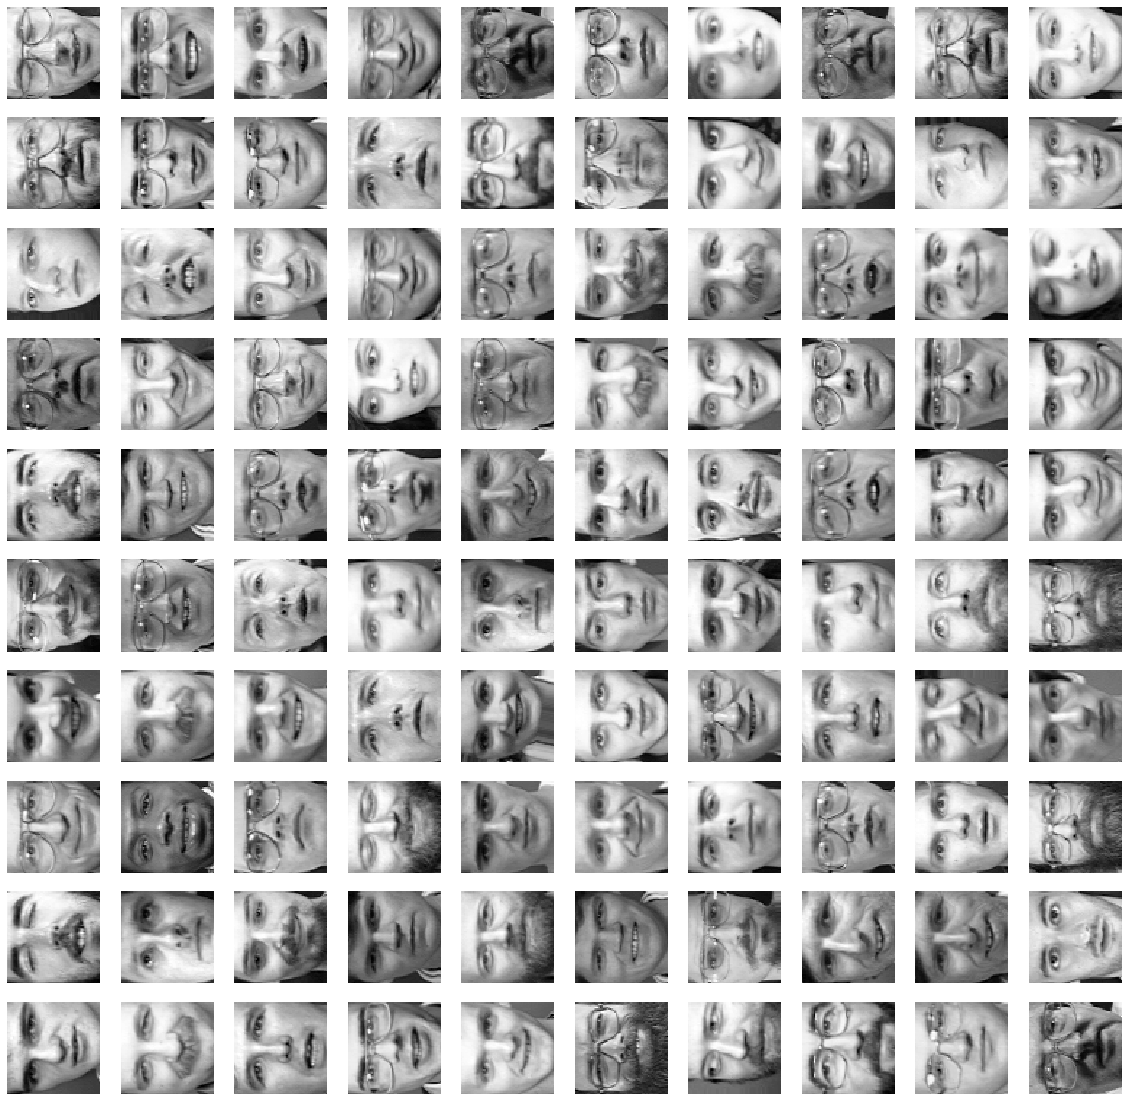

In [26]:
test_face = x_test.reshape(100, 64, 64)
plt.figure(figsize=(20, 20))

for i in range(0, 100):
  plt.subplot(10, 10, i + 1)
  plt.imshow(test_face[i], cmap = 'gray')
  plt.axis('off')

Reconstructed images:

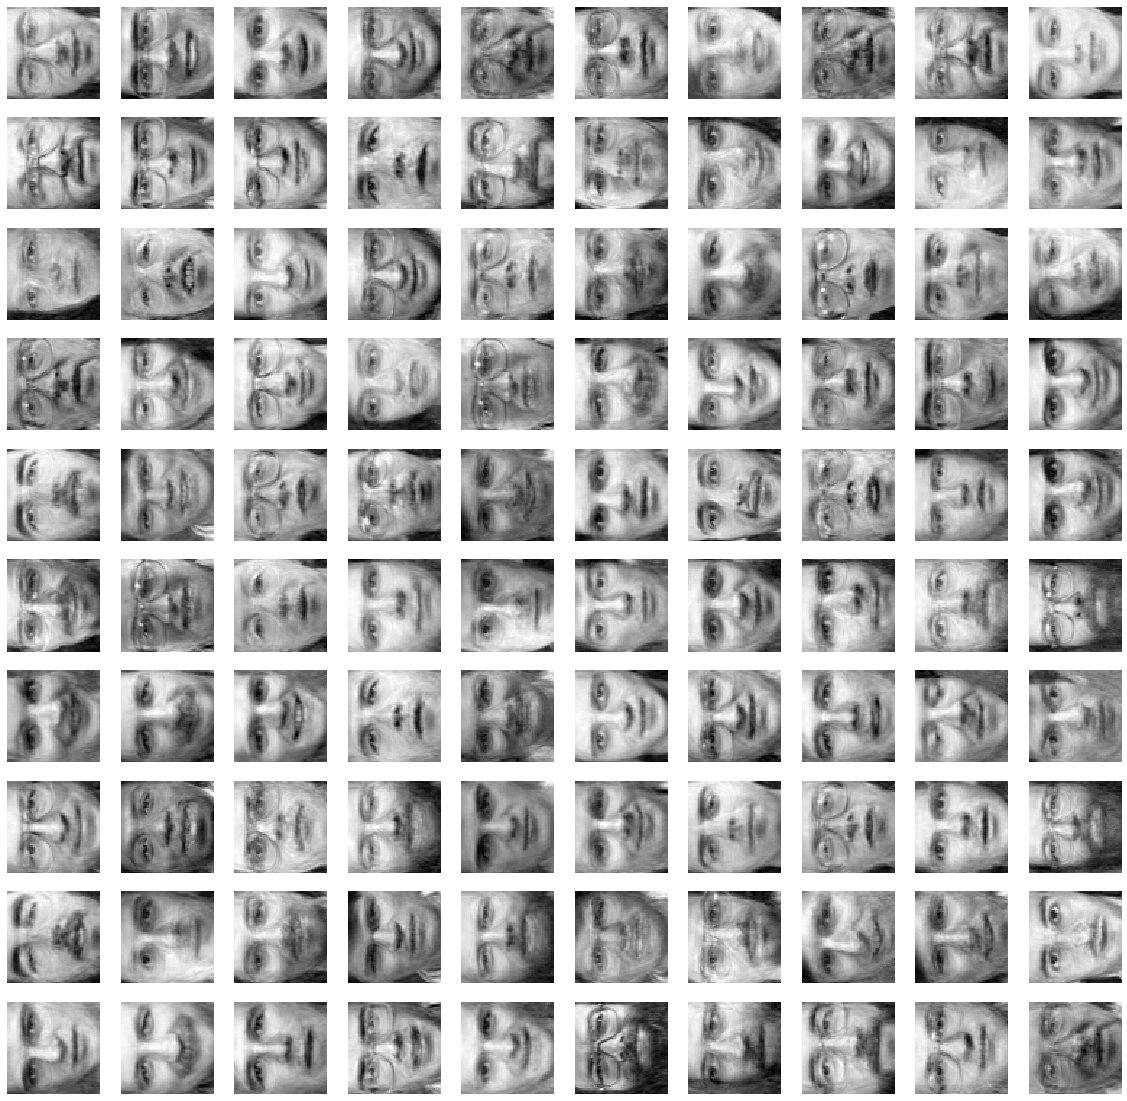

In [28]:
reconstructed_test_face = x_test_reconstructed.reshape(100, 64, 64)
plt.figure(figsize=(20, 20))

for i in range(0, 100):
  plt.subplot(10, 10, i + 1)
  plt.imshow(reconstructed_test_face[i], cmap = 'gray')
  plt.axis('off')